In [1]:
import wikipedia as wk
from IPython.core.display import clear_output

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10.7,4.27)})

## load data

In [3]:
# comedy link list
file = 'raw_comedy_04.pkl'
data_directory = os.path.join('..','data','raw_data/{}'.format(file))
df = pd.read_pickle(data_directory)
df.head()

,name,raw_title,summary,transcript,link,year,title
0,Louis C.K.,Sincerely Louis Ck (2020),Great comedy is finally back. Louis C.K. is no...,Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...,2020,Sincerely Louis Ck
1,Jim Norton,Jim Norton: American Degenerate (2013) – Full ...,"For his second EPIX comedy special, Jim Norton...",This year I wanted the opening of my new speci...,https://scrapsfromtheloft.com/2020/05/02/jim-n...,2013,American Degenerate
2,Jim Norton,Jim Norton: Monster Rain (2007) – Full Transcript,"His special ""Monster Rain,"" Jim Norton perform...","Thank you! Aw, thank you very much. Thank you,...",https://scrapsfromtheloft.com/2020/05/02/jim-n...,2007,Monster Rain
3,Daniel Sloss,Daniel Sloss: X (2019) – Full Transcript,Taking the stage before a sold-out audience at...,A man offered us a billion dollars. – Bolt the...,https://scrapsfromtheloft.com/2020/05/01/danie...,2019,X
4,Maria Bamford,Maria Bamford: Weakness Is The Brand (2020) – ...,"In this standup special ""Weakness Is the Brand...",[microphone droans]\n[music playing]\n[crowd c...,https://scrapsfromtheloft.com/2020/05/01/maria...,2020,Weakness Is The Brand


## Get len of transcript

In [4]:
df['len_transcript'] = df.transcript.str.len()

In [5]:
df.len_transcript.describe()

count      314.000000
mean     43545.522293
std      17993.700238
min         93.000000
25%      37322.750000
50%      46350.500000
75%      55170.500000
max      87452.000000
Name: len_transcript, dtype: float64

Text(0.5, 1.0, 'length of Transcript Distribution')

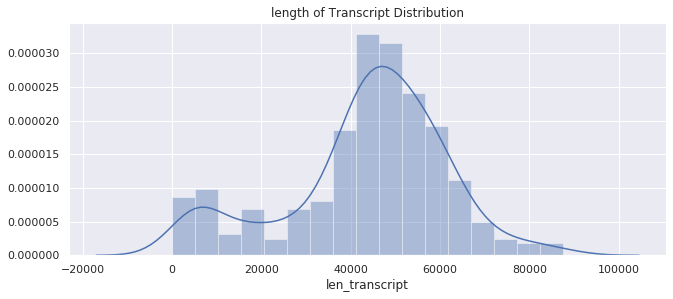

In [6]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

## Drop transcripts < 20,000
- select only transcripts that are 20K words or longer

In [7]:
large_transcripts = df.len_transcript>= 20000
df = df[large_transcripts]

Text(0.5, 1.0, 'length of Transcript Distribution')

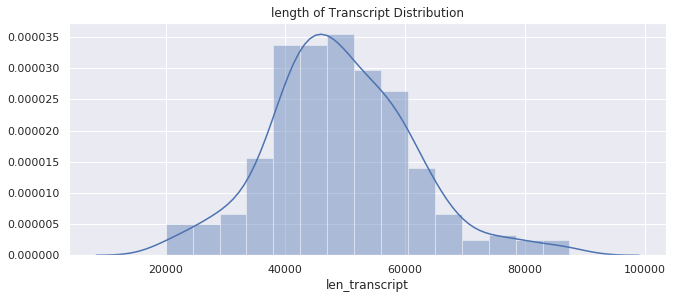

In [8]:
sns.distplot(df.len_transcript)
plt.title('length of Transcript Distribution')

## Extract DOB from wikipedia

In [9]:
def get_bday_wiki_rx(data):
    '''call wikipedia API to extract DOB from summary'''
    pat = r'(\d{2}\s[A-z]+\s|[A-z]+\s\d{2},?\s)?\d{4}'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name = data['name']
    print('bday extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        return result
    except:
        print('Some error.')

## Extract sex from wikipedia

In [10]:
def get_sex_wiki_rx(data):
    '''call wikipedia API to extact sex of person
    by searching how they are described'''
    pat = r'(He|She)'
    pattern = re.compile(pat,re.IGNORECASE|re.VERBOSE)
    name= data['name']
    print('sex extraction: {}'.format(name))
    clear_output(wait = True)
    try:
        page = wk.page(name)
        result = pattern.search(page.content).group()
        result = result.title()
        if result == 'She':
            return 'Female'
        elif result == 'He':
            return 'Male'
        else:
            return 'Unk'
    except:
        print('Some error')

## Apply function

In [11]:
len(df.name.value_counts(dropna=False))

140

In [12]:
name_list = list(df.name.unique())
len(name_list)

140

In [13]:
name_df = pd.DataFrame(name_list) 
name_df.rename(columns={0:'name'}, inplace=True)
name_df.head()

,name
0,Louis C.K.
1,Jim Norton
2,Daniel Sloss
3,Maria Bamford
4,Chris D'Elia


## Get DOB

In [14]:
%%time
name_df['dob'] = name_df.apply(get_bday_wiki_rx,axis=1)

CPU times: user 8.03 s, sys: 1.84 s, total: 9.88 s
Wall time: 3min 28s


In [15]:
name_df.dob.value_counts(dropna=False)[:10]

NaN     13
1964     3
1981     3
1971     3
1970     3
1966     2
1958     2
1974     2
1979     2
1977     2
Name: dob, dtype: int64

In [16]:
name_df.apply(lambda x: sum(x.isnull()))

name     0
dob     13
dtype: int64

In [17]:
name_df.head()

,name,dob
0,Louis C.K.,"September 12, 1967"
1,Jim Norton,"July 19, 1968"
2,Daniel Sloss,11 September 1990
3,Maria Bamford,1970
4,Chris D'Elia,2019


In [18]:
name_df[name_df.isnull().any(axis=1)]

,name,dob
7,Marc Maron,None
17,Tiffany Haddish,None
24,Amazon Rainforestclimate Changedeforestationha...,None
31,Adam Devine,None
58,Jeff Foxworthylarry The Cable Guy,None
59,Adam Sandler,None
72,Deray Davis,None
75,Russell Peters,None
82,John Mulaney,None
95,Katt Williams,None


## Update Null DOB's

In [19]:
name_df.loc[7, 'dob'] = 'September 27, 1963'
name_df.loc[17, 'dob'] = 'December 3, 1979'
name_df.loc[31, 'dob'] = 'November 7, 1983'
name_df.loc[59, 'dob'] = 'September 9, 1966'
name_df.loc[72, 'dob'] = 'February 26, 1982'
name_df.loc[75, 'dob'] = 'September 29, 1970'
name_df.loc[82, 'dob'] = 'August 26, 1982'
name_df.loc[95, 'dob'] = 'September 2, 1971'
name_df.loc[112, 'dob'] = 'August 4, 1941'
name_df.loc[128, 'dob'] = 'December 1, 1940'
name_df.loc[130, 'dob'] = 'June 26, 1970'
name_df.loc[58, 'dob'] = 'September 6, 1958'

In [20]:
name_df.apply(lambda x: sum(x.isnull()))

name    0
dob     1
dtype: int64

In [21]:
name_df[name_df.isnull().any(axis=1)]

,name,dob
24,Amazon Rainforestclimate Changedeforestationha...,None


## Get Sex

In [22]:
%%time
name_df['sex'] = name_df.apply(get_sex_wiki_rx,axis=1)

CPU times: user 5.7 s, sys: 1.12 s, total: 6.83 s
Wall time: 2min


In [23]:
name_df.sex.value_counts(dropna=False)

Male      115
Female     13
NaN        12
Name: sex, dtype: int64

In [24]:
name_df[name_df.isnull().any(axis=1)]

,name,dob,sex
7,Marc Maron,"September 27, 1963",None
17,Tiffany Haddish,"December 3, 1979",None
24,Amazon Rainforestclimate Changedeforestationha...,None,None
31,Adam Devine,"November 7, 1983",None
58,Jeff Foxworthylarry The Cable Guy,"September 6, 1958",None
59,Adam Sandler,"September 9, 1966",None
75,Russell Peters,"September 29, 1970",None
82,John Mulaney,"August 26, 1982",None
95,Katt Williams,"September 2, 1971",None
112,Paul Mooney,"August 4, 1941",None


In [36]:
name_df.iloc[17].sex ='Female'

In [37]:
name_df[name_df.isnull().any(axis=1)]

,name,dob,sex
7,Marc Maron,"September 27, 1963",None
24,Amazon Rainforestclimate Changedeforestationha...,None,None
31,Adam Devine,"November 7, 1983",None
58,Jeff Foxworthylarry The Cable Guy,"September 6, 1958",None
59,Adam Sandler,"September 9, 1966",None
75,Russell Peters,"September 29, 1970",None
82,John Mulaney,"August 26, 1982",None
95,Katt Williams,"September 2, 1971",None
112,Paul Mooney,"August 4, 1941",None
128,Richard Pryor,"December 1, 1940",None


In [38]:
name_df.sex.fillna('Male',inplace=True)

In [40]:
name_df.sex.value_counts(dropna=False)

Male      127
Female     13
Name: sex, dtype: int64

In [41]:
name_df.head()

,name,dob,sex
0,Louis C.K.,"September 12, 1967",Male
1,Jim Norton,"July 19, 1968",Male
2,Daniel Sloss,11 September 1990,Female
3,Maria Bamford,1970,Female
4,Chris D'Elia,2019,Male


In [42]:
# change to datetime
name_df.dob = pd.to_datetime(name_df.dob)

In [43]:
name_df.head()

,name,dob,sex
0,Louis C.K.,1967-09-12,Male
1,Jim Norton,1968-07-19,Male
2,Daniel Sloss,1990-09-11,Female
3,Maria Bamford,1970-01-01,Female
4,Chris D'Elia,2019-01-01,Male


## Merge dataframes

In [44]:
df = pd.merge(df,name_df,on='name')
df.head()

,name,raw_title,summary,transcript,link,year,title,len_transcript,dob,sex
0,Louis C.K.,Sincerely Louis Ck (2020),Great comedy is finally back. Louis C.K. is no...,Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...,2020,Sincerely Louis Ck,44135,1967-09-12,Male
1,Louis C.K.,Louis C.K.: Chewed Up (2008) – Full Transcript,"Transcript of 'Chewed Up', Louis C.K.'s second...",Filmed at the Berklee Performance Center in Bo...,https://scrapsfromtheloft.com/2017/07/07/louis...,2008,Chewed Up,40121,1967-09-12,Male
2,Louis C.K.,Louis C.K.: Live At The Beacon Theatre (2011) ...,"Louis jokes about fatherhood, success, and fly...",[indistinct chatter] — Louis! — Louis! [indist...,https://scrapsfromtheloft.com/2017/06/28/louis...,2011,Live At The Beacon Theatre,43930,1967-09-12,Male
3,Louis C.K.,Louis C.K.: Shameless (2007) – Full Transcript,Please welcome Louis C.K.! Thank you. Thank yo...,Please welcome Louis C.K.! Thank you. Thank yo...,https://scrapsfromtheloft.com/2017/05/30/louis...,2007,Shameless,48454,1967-09-12,Male
4,Louis C.K.,Louis C.K.: Oh My God (2013) – Full Transcript,'Oh My God' is the fifth comedy special perfor...,Intro\nFade the music out. Let’s roll. Hold th...,https://scrapsfromtheloft.com/2017/05/06/louis...,2013,Oh My God,39141,1967-09-12,Male


## Check null values

In [45]:
df.apply(lambda x: sum(x.isnull()))

name              0
raw_title         0
summary           0
transcript        0
link              0
year              0
title             0
len_transcript    0
dob               1
sex               0
dtype: int64

## Save dataset

In [46]:
data_directory_saves = os.path.join( '..','data','raw_data/')
df.to_pickle(data_directory_saves+'raw_comedy_05.pkl')